# CHE1148 Assignment 4

#### YANBIN ZHANG 1008879732

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Import annual feature data; Extract X and y

In [58]:
annual_features = pd.read_csv('annual_features.csv')

In [59]:
X = annual_features.drop(['customer_id','response'], axis = 1)
y = annual_features['response']


### Split train and test set and compute the completeness of X_train

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/3, random_state=1147)

print("The percentage of non-zero elements in X_train is: {:.2f} %".format(np.count_nonzero(X_train)/ X_train.size * 100))

The percentage of non-zero elements in X_train is: 85.73 %


In [61]:
colnames = X_train.columns
completeness = []
for i in range(len(X_train.columns)):
    completeness.append(np.count_nonzero(X_train.iloc[:,i]) /len(X_train.iloc[:,i]) * 100)
    # Since the dataset doesnot contain NaN value, count completeness using the non-zero counts

### Standardize the train and test set

In [62]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
rf = RandomForestClassifier(n_estimators = 500, max_features="auto", random_state=1148)
rf.fit(X_train, y_train) 
importances = rf.feature_importances_

Using GridSearchCV tuning the best parameters of random forest classifier, and fit the model get the feature importance.

### Create the completeness-feature importance graph

In [65]:
feature_importance = pd.DataFrame(importances, index=colnames, columns=['Feature Importance'])
feature_importance = feature_importance.sort_values(by=['Feature Importance'], ascending=False)
feature_importance.head(10)

,Feature Importance
2014_ann_txn_amt_sum,0.060078
2013_ann_txn_amt_sum,0.048179
2014_ann_txn_amt_ave,0.034487
Unnamed: 0,0.034056
2014_ann_txn_amt_cnt,0.033207
2013_ann_txn_amt_ave,0.031661
2013_ann_txn_amt_sem,0.030701
2014_ann_txn_amt_sem,0.029488
2012_ann_txn_amt_sem,0.029268
2012_ann_txn_amt_ave,0.029234


In [66]:
log_completeness = np.log(np.array(completeness))
Completeness = pd.DataFrame(log_completeness, index=colnames, columns=['Completeness'])
Completeness = Completeness.sort_values(by=['Completeness'], ascending=False)
Completeness.head(10)

,Completeness
Unnamed: 0,4.604734
2012_ann_txn_amt_sum,4.596853
2012_ann_txn_amt_cnt,4.596853
2012_ann_txn_amt_min,4.596853
2012_ann_txn_amt_max,4.596853
2012_ann_txn_amt_ave,4.596853
2014_ann_txn_amt_sum,4.592448
2014_ann_txn_amt_ave,4.592448
2014_ann_txn_amt_max,4.592448
2014_ann_txn_amt_min,4.592448


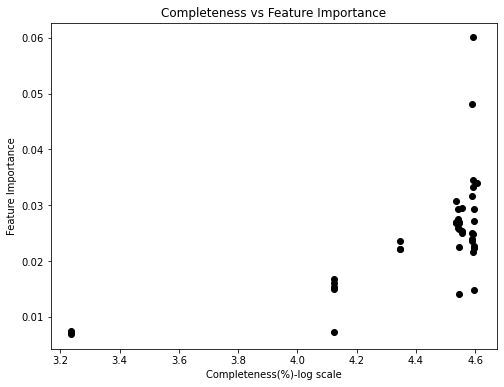

In [67]:
plt.figure(figsize=(8,6))
log_completeness = np.log(np.array(completeness))
plt.plot(log_completeness, importances, 'o', color='black')
plt.xlabel('Completeness(%)-log scale')
plt.ylabel('Feature Importance')
plt.title('Completeness vs Feature Importance')
plt.show()

#### Comment

There are no missing values in the current dataset since they were previously filled with 0 in previous assignments. The completeness of the dataset is determined by counting the non-zero elements in each column of the training set.

The completeness-feature importance graph presented indicates a robust correlation between the completeness of the training set in logarithmic scale and feature importance. As the completeness of a feature increases, the feature importance also grows from 0.00 to 0.05. Features with a completeness greater than 4.5 (log scale) have higher feature importance, with the highest value being around 0.05.

The graph highlights that higher completeness tends to have a higher feature importance. Therefore, it is recommended to redesign the data by prioritizing features with higher completeness, which means having fewer missing values in the data. During data collection, it is essential to gather all relevant information to maximize the completeness of the dataset.